In [322]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import pandas as pd

In [324]:
data = pd.read_csv('1.csv',delimiter = ' ')

In [325]:
data

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9
0,0.035995,-0.472641,-0.480957,-0.491470,-0.491348,-0.491348,-0.491272,-0.491455,0.0,closed
1,0.016296,-0.254547,-0.265121,-0.291550,-0.327347,-0.348938,-0.357742,-0.393143,0.0,closed
2,0.011414,-0.059555,-0.070663,-0.101028,-0.140900,-0.163498,-0.175308,-0.214157,0.0,closed
3,0.003250,0.208344,0.196457,0.166916,0.128632,0.105057,0.092102,0.055847,0.0,closed
4,0.000656,0.404037,0.395920,0.370926,0.337173,0.315491,0.304291,0.271347,0.0,closed
...,...,...,...,...,...,...,...,...,...,...
1505,0.006927,0.380753,0.383835,0.370621,0.352158,0.340424,0.338760,0.321503,0.0,closed
1506,0.014938,0.409729,0.414368,0.403366,0.387253,0.376419,0.377548,0.360764,0.0,closed
1507,0.003998,0.413773,0.420013,0.410004,0.396545,0.386169,0.386429,0.372635,0.0,closed
1508,0.016174,0.399490,0.407257,0.399826,0.388596,0.380630,0.383011,0.372131,0.0,closed


In [326]:
data[data['0.0.9'] == 'start_threshold']

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9
1171,0.012344,-0.364151,-0.346176,-0.340134,-0.337677,-0.334106,-0.317032,-0.313232,0.0,start_threshold
1172,0.022400,-0.431900,-0.418503,-0.415909,-0.418701,-0.418564,-0.403992,-0.406006,0.0,start_threshold
1173,0.002823,-0.429489,-0.421219,-0.425125,-0.434738,-0.438873,-0.428925,-0.437500,0.0,start_threshold
1174,0.019791,-0.411636,-0.407394,-0.416550,-0.431686,-0.440079,-0.434845,-0.449722,0.0,start_threshold
1175,0.013519,-0.338867,-0.336914,-0.349106,-0.368332,-0.378647,-0.375778,-0.394638,0.0,start_threshold
1176,0.010910,-0.252823,-0.254440,-0.269669,-0.293686,-0.306778,-0.307602,-0.330261,0.0,start_threshold
1177,0.008530,-0.145462,-0.147476,-0.164719,-0.189713,-0.204407,-0.206543,-0.230743,0.0,start_threshold
1178,-0.001602,-0.042664,-0.044434,-0.062012,-0.087219,-0.101913,-0.104385,-0.128494,0.0,start_threshold
1179,0.000610,0.073105,0.070831,0.051498,0.025497,0.010300,0.006653,-0.017914,0.0,start_threshold
1180,-0.000549,0.191086,0.195709,0.180222,0.155670,0.140869,0.138474,0.115097,0.0,start_threshold


In [327]:
data = data[1207:]

In [328]:
data

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9
1207,-0.001801,0.357910,0.382431,0.382294,0.382172,0.379562,0.388016,0.386551,0.0,open
1208,0.014008,0.256454,0.275787,0.282425,0.287643,0.289246,0.301361,0.305771,0.0,open
1209,0.005005,0.117355,0.139740,0.151566,0.161682,0.166946,0.184311,0.194351,0.0,open
1210,0.008774,-0.056320,-0.033035,-0.019806,-0.010254,-0.003937,0.015198,0.026474,0.0,open
1211,0.009918,-0.225342,-0.205826,-0.196213,-0.189255,-0.184326,-0.165649,-0.157898,0.0,open
...,...,...,...,...,...,...,...,...,...,...
1505,0.006927,0.380753,0.383835,0.370621,0.352158,0.340424,0.338760,0.321503,0.0,closed
1506,0.014938,0.409729,0.414368,0.403366,0.387253,0.376419,0.377548,0.360764,0.0,closed
1507,0.003998,0.413773,0.420013,0.410004,0.396545,0.386169,0.386429,0.372635,0.0,closed
1508,0.016174,0.399490,0.407257,0.399826,0.388596,0.380630,0.383011,0.372131,0.0,closed


In [329]:
open = data[data['0.0.9']=='open']

In [330]:
closed = data[data['0.0.9']=='closed']

In [331]:
open

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9
1207,-0.001801,0.357910,0.382431,0.382294,0.382172,0.379562,0.388016,0.386551,0.0,open
1208,0.014008,0.256454,0.275787,0.282425,0.287643,0.289246,0.301361,0.305771,0.0,open
1209,0.005005,0.117355,0.139740,0.151566,0.161682,0.166946,0.184311,0.194351,0.0,open
1210,0.008774,-0.056320,-0.033035,-0.019806,-0.010254,-0.003937,0.015198,0.026474,0.0,open
1211,0.009918,-0.225342,-0.205826,-0.196213,-0.189255,-0.184326,-0.165649,-0.157898,0.0,open
...,...,...,...,...,...,...,...,...,...,...
1485,0.006439,-0.442474,-0.432449,-0.433670,-0.440903,-0.443466,-0.431747,-0.437515,0.0,open
1486,0.016693,-0.451401,-0.444305,-0.449326,-0.460464,-0.464920,-0.455521,-0.464951,0.0,open
1487,0.000412,-0.439529,-0.434967,-0.442673,-0.457047,-0.464325,-0.457901,-0.471222,0.0,open
1488,0.015900,-0.398041,-0.394974,-0.404373,-0.421921,-0.430069,-0.425964,-0.441696,0.0,open


In [332]:
closed

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9
1217,0.000778,-0.226196,-0.228394,-0.244339,-0.268173,-0.282242,-0.283340,-0.306503,0.0,closed
1218,0.003189,-0.123642,-0.125000,-0.141327,-0.165405,-0.179886,-0.181549,-0.205063,0.0,closed
1219,0.008163,-0.016342,-0.018005,-0.035507,-0.060623,-0.075363,-0.077744,-0.101944,0.0,closed
1220,0.021927,0.099930,0.097397,0.079971,0.055313,0.039612,0.035797,0.012344,0.0,closed
1221,0.008026,0.216034,0.215332,0.199982,0.176483,0.162079,0.159241,0.137787,0.0,closed
...,...,...,...,...,...,...,...,...,...,...
1504,0.010513,0.344604,0.345474,0.331680,0.312454,0.297821,0.296234,0.276535,0.0,closed
1505,0.006927,0.380753,0.383835,0.370621,0.352158,0.340424,0.338760,0.321503,0.0,closed
1506,0.014938,0.409729,0.414368,0.403366,0.387253,0.376419,0.377548,0.360764,0.0,closed
1507,0.003998,0.413773,0.420013,0.410004,0.396545,0.386169,0.386429,0.372635,0.0,closed


In [335]:
closed = pd.concat([data[0:10],data[20:30],data[40:50],data[60:70],data[80:90],data[100:110],data[120:130],data[140:150],data[160:170],data[180:190]])

In [336]:
closed

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9
1207,-0.001801,0.357910,0.382431,0.382294,0.382172,0.379562,0.388016,0.386551,0.0,open
1208,0.014008,0.256454,0.275787,0.282425,0.287643,0.289246,0.301361,0.305771,0.0,open
1209,0.005005,0.117355,0.139740,0.151566,0.161682,0.166946,0.184311,0.194351,0.0,open
1210,0.008774,-0.056320,-0.033035,-0.019806,-0.010254,-0.003937,0.015198,0.026474,0.0,open
1211,0.009918,-0.225342,-0.205826,-0.196213,-0.189255,-0.184326,-0.165649,-0.157898,0.0,open
...,...,...,...,...,...,...,...,...,...,...
1392,0.015518,-0.028671,-0.005264,0.006165,0.016357,0.022278,0.041245,0.052963,0.0,open
1393,0.010895,-0.097275,-0.074936,-0.063400,-0.054749,-0.047546,-0.029388,-0.019043,0.0,open
1394,0.001846,-0.161270,-0.138748,-0.127823,-0.118332,-0.112701,-0.093613,-0.083755,0.0,open
1395,0.007675,-0.246140,-0.225403,-0.214127,-0.206512,-0.200302,-0.180984,-0.172150,0.0,open


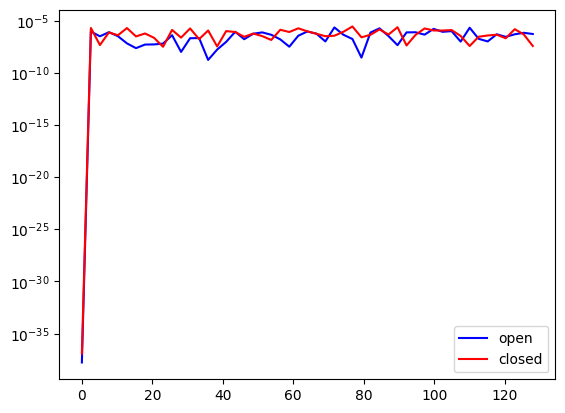

In [337]:
f,psd = scipy.signal.periodogram(open['0.0'],256, scaling='density')
plt.semilogy(f,psd,label='open',color='b')
f,psd = scipy.signal.periodogram(closed['0.0'],256, scaling='density')
plt.semilogy(f,psd,label='closed',color='r')
plt.legend()


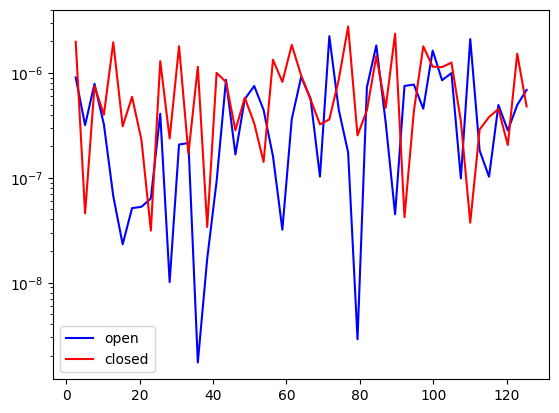

In [338]:
f,psd = scipy.signal.periodogram(open['0.0'],256, scaling='density')
plt.semilogy(f[1:-1],psd[1:-1],label='open',color='b')
f,psd = scipy.signal.periodogram(closed['0.0'],256, scaling='density')
plt.semilogy(f[1:-1],psd[1:-1],label='closed',color='r')
plt.legend()


(8.0, 12.0)

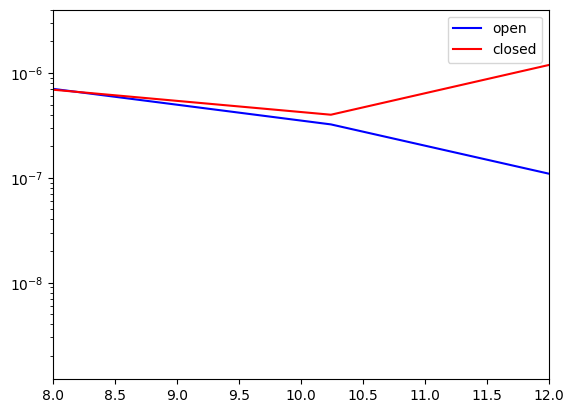

In [339]:
f,psd = scipy.signal.periodogram(open['0.0'],256, scaling='density')
plt.semilogy(f[1:-1],psd[1:-1],label='open',color='b')
f,psd = scipy.signal.periodogram(closed['0.0'],256, scaling='density')
plt.semilogy(f[1:-1],psd[1:-1],label='closed',color='r')
plt.legend()
plt.xlim(8,12)
